In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [2]:
MNIST_URL="https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true"
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl'

In [3]:
from urllib.request import urlretrieve
if not path_gz.exists():
    urlretrieve(MNIST_URL, path_gz)

In [4]:
!ls -l data/

total 33872
-rw-r--r--  1 pbanavara  staff  17051982 Jul 17 11:20 mnist.pkl
-rw-r--r--  1 pbanavara  staff    284647 Jul 17 11:04 mnist.pkl.gz


In [5]:
with gzip.open(path_data/'mnist.pkl', 'rb') as f:
    print(f)
    ((x_train, y_train), (x_val, y_val), _) = pickle.load(f, encoding='latin-1')
    

<gzip _io.BufferedReader name='data/mnist.pkl' 0x11d516320>


In [6]:
lst1 = list(x_train[100])
vals = lst1[200:210]
len(lst1)

784

In [7]:
def chunks(x, sz):
    for i in range(0, len(x), sz):
        yield x[i:i+sz]

In [8]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.05859375, 0.3671875, 0.63671875]]

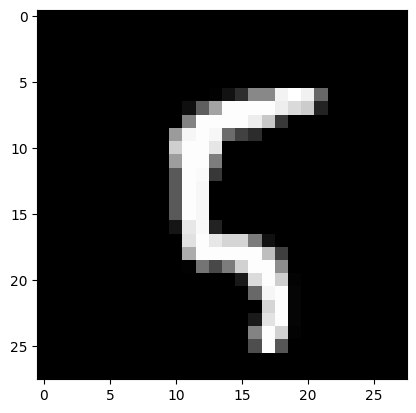

In [9]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)))

In [10]:
from itertools import islice

In [11]:
islice?

Init signature: islice(self, /, *args, **kwargs)
Docstring:     
islice(iterable, stop) --> islice object
islice(iterable, start, stop[, step]) --> islice object

Return an iterator whose next() method returns selected values from an
iterable.  If start is specified, will skip all preceding elements;
otherwise, start defaults to zero.  Step defaults to one.  If
specified as another value, step determines how many values are
skipped between successive calls.  Works like a slice() on a list
but returns an iterator.
Type:           type
Subclasses:     

In [12]:
it = iter(vals)
isit = islice(it, 5)

In [13]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

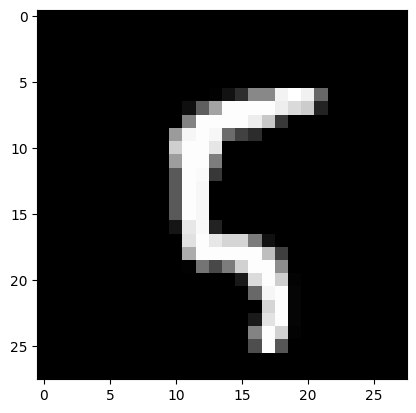

In [14]:
plt.imshow(img)

In [15]:
img[20][15]

0.09765625

In [23]:
class Matrix:
    def __init__(self, xs):
        self.xs = xs

    def __getitem__(self, idxs):
        return self.xs[idxs[0]][idxs[1]]

In [24]:
m = Matrix(img)
m[20,15]

0.09765625

In [25]:
import torch
from torch import tensor

In [26]:
x_train, y_train, x_val, y_val = map(tensor, (x_train, y_train, x_val, y_val))
x_train.shape

torch.Size([50000, 784])

In [27]:
imgs = x_train.reshape(-1, 28, 28)

In [28]:
imgs.shape

torch.Size([50000, 28, 28])

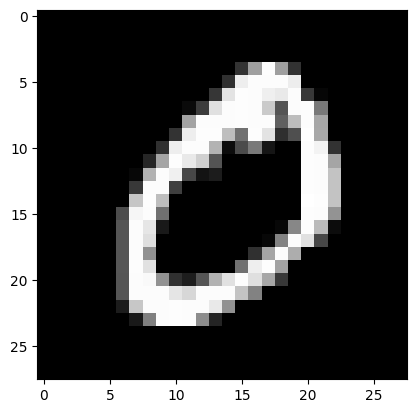

In [30]:
plt.imshow(imgs[1])

In [31]:
x_train.shape

torch.Size([50000, 784])